In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import minmax_scale

from scipy.stats import norm, gaussian_kde

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Download the date
https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip


In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip

--2022-08-02 00:49:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010222 (1.9M) [application/x-httpd-php]
Saving to: ‘codon_usage.csv.zip’

codon_usage.csv.zip 100%[===================>]   1.92M  4.28MB/s    in 0.4s    

2022-08-02 00:49:25 (4.28 MB/s) - ‘codon_usage.csv.zip’ saved [2010222/2010222]



In [3]:
!unzip codon_usage.csv.zip

Archive:  codon_usage.csv.zip
  inflating: codon_usage.csv         
   creating: __MACOSX/
  inflating: __MACOSX/._codon_usage.csv  


# Data Preprocessing

In [4]:
def read_data(file_name):
    """
    Reads in a csv file and returns a dataframe
    """
    return pd.read_csv(file_name, low_memory=False)

dataset = read_data('codon_usage.csv')
df = dataset.copy()

In [5]:
# dataset = read_data('codon_usage.csv')
dataset.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [6]:
dataset

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [7]:
# dataset.dropna(inplace=True)

dataset['Kingdom'].value_counts()

bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [8]:
print(dataset.isnull().sum())

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64


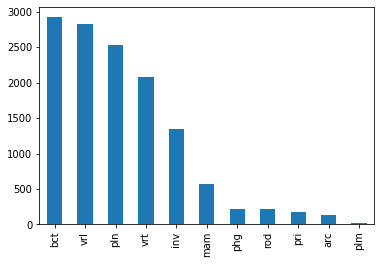

In [9]:
dataset['Kingdom'].value_counts().plot(kind='bar')

In [10]:
classes_dict = {    'arc': 0, 'bct': 1, 'phg': 2, 'plm': 3, 
                    'pln': 4, 'inv': 5, 'vrt': 6, 'mam': 7,
                    'rod': 8, 'pri': 9, 'vrl':10
                }

In [11]:
dataset['Kingdom'] = dataset['Kingdom'].map(classes_dict)

In [12]:
# dataset['Kingdom'].value_counts().plot(kind='bar')

In [13]:
dataset = dataset.drop(dataset[dataset['SpeciesID']==353569].index)
dataset = dataset.drop(dataset[dataset['SpeciesID']==12440].index)


In [14]:
dataset['UUU'] = dataset['UUU'].astype(float)
dataset['UUC'] = dataset['UUC'].astype(float)
# dataset = minmax_scale(dataset)
# cols = dataset.select_dtypes(np.number).columns

# num_columns_list = list(cols)
# # num_columns_list

# num_columns_list.remove('Kingdom')
# # num_columns_list.remove('DNAtype')
# num_columns_list.remove('SpeciesID')
# # num_columns_list.remove('Ncodons')
# # num_columns_list

# Removing the minmax_scale of the columns because it is not necessary it might lead to 0
# for num_column in num_columns_list:
#     dataset[num_column] = minmax_scale(dataset[num_column]) 

In [15]:
dataset.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,10,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,10,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,10,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,10,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,10,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [16]:
X = dataset.iloc[:, 1:]
X.drop(['SpeciesName', 'SpeciesID', 'DNAtype', 'Ncodons'], axis=1, inplace=True)
X

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,0.03555,0.01459,0.03920,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,0.03096,0.06386,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,0.02728,0.06643,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,0.01600,0.02082,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [17]:
X = X.values.astype(float)
y = dataset.iloc[:, 0]

In [18]:
class DataGenerator:

    def __init__(self, X, y, sampleSize=16):
        self.X = X
        self.y = y
        self.sampleSize = sampleSize
        if self.sampleSize <= 0 and self.sampleSize > len(self.X):
            return TypeError("sampleSize must be between 0 and ", len(X))

    def split_data(self, test_size=0.2, random_state=1):
        self.X_train, self.X_rem, self.y_train, self.y_rem = tts(self.X, self.y, test_size=test_size, random_state=random_state)
        return self.X_train, self.X_rem, self.y_train, self.y_rem
    

In [19]:
X.shape

(13026, 64)

In [20]:
y.shape

(13026,)

In [21]:
data_generator = DataGenerator(y=y, X=X)
X_training, X_testing, y_training, y_testing = data_generator.split_data()
X_training_original = X_training.copy()
y_training_original = y_training.copy()

In [22]:
def sampler(X, y, technique):
    if technique =='ros':
        ros = RandomOverSampler(random_state=1)
        X_training, y_training = ros.fit_resample(X, y)
    
    elif technique =='smote':
        smoothing = SMOTE(random_state=1)
        X_training, y_training = smoothing.fit_resample(X, y)
    
    elif technique =='adasyn':
        adasyn = ADASYN(random_state=1)
        X_training, y_training = adasyn.fit_resample(X, y)
    
    return X_training, y_training

In [23]:
class MultiClassClassification:
    def __init__(self, X_train, y_train, laplace_smoothing_value, laplace, total_classes=11, for_arc = False, for_plm = False):
        self.laplace_smoothing_value = laplace_smoothing_value
        self.laplace = laplace
        self.total_classes = total_classes
        self.X_train = X_train
        self.y_train = y_train
        self.for_arc = for_arc
        self.for_plm = for_plm
        self.fitFeatures = []
        self.list_of_ranges = []
        self.set_of_ranges = set([])

    def fit_distribution(self, data):

        # mean = np.mean(data) # mean of the data
        # std = np.std(data) # standard deviation of the data
        # dist = norm(mean, std) # create a normal distribution with the mean and standard deviation

        # return dist
        return gaussian_kde(data)  # return the distribution

    def laplace_smoothing(self, classes, length):
        smooths = np.empty(self.total_classes, dtype=object)
        for i in range(length):
            smooths[i] = (classes[i] + self.laplace_smoothing_value) / \
                ((classes[i].size) +
                 self.laplace_smoothing_value * self.n_features)

        return smooths

    def probability(self, data):
        py = np.ones(self.total_classes)

        for i in range(self.n_features):
            for j in range(self.total_classes):
                py[j] *= self.features['X'+str(i)+'-'+str(j)].pdf(data[i])

        for i in range(self.total_classes):
            py[i] *= self.prior[i]

        # print('while training: ', py)
        return py

    def laplace_probability(self, data):

        py = np.ones(self.total_classes)
        pdf = np.ones(self.total_classes)

        for i in range(self.n_features):
            for j in range(self.total_classes):
                pdf[j] *= self.features['X'+str(i)+'-'+str(j)].pdf(data[i])

            smooths = self.laplace_smoothing(pdf, self.total_classes)
            for j in range(self.total_classes):
                py[j] *= smooths[j]

        for i in range(self.total_classes):
            py[i] *= self.prior[i]

        return py

    def fit(self):

        X_training_class = np.empty(self.total_classes, dtype=object)
        for i in range(self.total_classes):
            X_training_class[i] = self.X_train[self.y_train == i]

        self.prior = np.zeros(self.total_classes)
        for i in range(self.total_classes):
            # print('setting prior', i)
            # if self.for_arc or self.for_plm:
            #     self.prior[i] = 1 - (len(X_training_class[i]) / len(self.X_train))
            # else:
            #     self.prior[i] = len(X_training_class[i]) / len(self.X_train)
            self.prior[i] = len(X_training_class[i]) / len(self.X_train)

        self.n_features = self.X_train.shape[1]
        print('Number of features: ', self.n_features)
        self.features = {}

        for i in range(self.n_features):
            for j in range(self.total_classes):
                temp = 'X'+str(i)+'-'+str(j)
                self.features[temp] = self.fit_distribution(X_training_class[j][:, i])
                # print(str(i), str(j), temp)
                # self.list_of_ranges.append(temp)
                # if temp in self.set_of_ranges:
                #     print(str(i), str(j), 'Error: ', temp, ' already exists')
                # self.set_of_ranges.add(temp)


    def newvaluate(self):
        print(self.list_of_ranges)
        print(self.set_of_ranges)

    def predict(self, X_test, y_test):
        y_predicted = []
        
        y = []
        for sample, target in zip(X_test, y_test):

            if self.laplace:
                py = self.laplace_probability(sample)

            else:
                py = self.probability(sample)

            # print("Model predicted class {} and truth was {}".format(np.argmax(py), target))
            # print(py)
            # print(np.argmax(py))
            y_predicted.append(np.argmax(py))
            # print(target)
            
            # y_second_predicted.append(np.argsort(np.max(py, axis=0))[-2])
            y.append(target)

        y_predicted = np.array(y_predicted)
        y = np.array(y)
        return y_predicted, y


In [24]:
import matplotlib.pyplot as plt


def draw_matrix(true_positive, false_positive, false_negative, true_negative):
    '''
      Draw a confusion matrix.
    '''
    matrix = np.array([[true_positive, false_negative],
                      [false_positive, true_negative]])
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.inferno_r)
    plt.colorbar()
    plt.show()


def confusion_matrix_calculator(y, y_predicted, desired_class):
    '''
      Takes original classes and predicted classes as input
    '''
    print('total y', y.size)
    print('total y_predicted', y_predicted.size)

    actual = (y == desired_class)
    predicted = (y_predicted == desired_class)
    print('actual', actual.sum())
    true_positive = (actual & predicted).sum()
    false_negative = (actual & ~predicted).sum()
    false_positive = (~actual & predicted).sum()
    true_negative = (~actual & ~predicted).sum()

    return true_positive, false_negative, false_positive, true_negative


In [25]:
def validation(given_y, y_predicted, classification_class='Kingdom', desired_classes = classes_dict):
    '''
      Takes sampling technique as input

      Returns:
        precision, recall, accuracy
    '''
    for class_name in desired_classes.keys():
        print(class_name)
        print(dataset[dataset[classification_class] == int(
            desired_classes.get(class_name))][classification_class].count())
        true_positive, false_negative, false_positive, true_negative = confusion_matrix_calculator(y=given_y, y_predicted=y_predicted, desired_class=int(desired_classes.get(class_name)))
        # draw_matrix(true_positive= true_positive, true_negative= true_negative, false_positive= false_positive, false_negative= false_negative)
        print("true positive:", true_positive)
        print("false negative:", false_negative)
        print("false positive:", false_positive)
        print("true negative:", true_negative)
        print("Precision:", true_positive / (true_positive + false_positive))
        print("True Positive rate or Recall:",
              true_positive / (true_positive + false_negative))
        print("specificity, selectivity or True Negative Rate:",
              true_negative / (true_negative + false_positive))
        print("Accuracy:", (true_positive + true_negative) /
              (true_positive + false_positive + false_negative + true_negative))
        print("\n")


In [26]:
def original_accuracy(y, y_predicted):
    '''
      Takes original classes and predicted classes as input
    '''
    actual = (y == y_predicted)
    return actual.sum() / len(y)


In [ ]:
# # techniques = ['smote', 'ros']
# techniques = ['smote']

# for technique in techniques:
#     # sampler(X, y, technique)
#     print('Using Sampling Technique: ', technique)
#     SCALLED_X_train, SCALLED_y_train = sampler(X, y ,technique=technique)
#     data_generator = DataGenerator(y=SCALLED_y_train, X=SCALLED_X_train)
#     X_train, X_test, y_train, y_test = data_generator.split_data()
#     # X_train, y_train, 
#     # X_train, y_train = X_training, y_training
#     print('X_training shape: ', X_train.shape)
#     print('y_training shape: ', y_train.shape)
#     print('X_testing shape: ', X_testing.shape)
#     print('y_testing shape: ', y_testing.shape)

#     print('\n')
#     y_train.value_counts().plot(kind='bar')
#     plt.show()
#     print('\n')

#     clf = MultiClassClassification(X_train=X_train, y_train=y_train, total_classes=11, laplace=False, laplace_smoothing_value=0.5,  for_arc=False, for_plm=False)
#     clf.fit()
#     print('Model is trained')
#     # y_predicted, y
#     y_predicted, given_y = clf.predict(X_test=X_testing, y_test=y_testing)
#     print('X_testing shape: ', X_testing.shape)
#     print('y_testing shape: ', y_testing.shape)
    
#     print('Y_predicted: ', y_predicted)
#     print('y_predicted shape: ', y_predicted.shape)
#     print('Y_test: ', given_y)
#     print('y_test shape: ', given_y.shape)
#     print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
#     validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)


#     # 'arc': 0, 'bct': 1, 'phg': 2, 'plm': 3, 
#     # clf_arc = MultiClassClassification(X_train=X_training, y_train=y_training, total_classes=11, laplace=False, laplace_smoothing_value=0.5, for_arc=True)
#     # clf_arc.fit()
#     # print('Model is trained for ARC')
#     # y_predicted, given_y = clf_arc.predict(X_test=X_testing, y_test=y_testing)
#     # print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
#     # validation(given_y= given_y, y_predicted= y_predicted, desired_classes = {'arc': 0})
    
    
#     # clf_prc = MultiClassClassification(X_train=X_training, y_train=y_training, laplace=False, total_classes=11, laplace_smoothing_value=0.5, for_plm=True)
#     # clf_prc.fit()
#     # y_predicted, given_y = clf_prc.predict(X_test=X_testing, y_test=y_testing)
#     # print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
#     # validation(given_y= given_y, y_predicted= y_predicted, desired_classes = {'plm': 3})


In [30]:
SCALLED_X_train, SCALLED_y_train = sampler(X, y ,technique='smote')
X = minmax_scale(X)
data_generator = DataGenerator(y=SCALLED_y_train, X=SCALLED_X_train)
X_train, X_test, y_train, y_test = data_generator.split_data()

In [31]:
X_train

array([[0.10541183, 0.1647316 , 0.07689353, ..., 0.03616204, 0.01441034,
        0.0177055 ],
       [0.07243783, 0.2868572 , 0.03278971, ..., 0.01156437, 0.01414539,
        0.00531852],
       [0.04053771, 0.32342903, 0.01295603, ..., 0.00512029, 0.00330091,
        0.01554565],
       ...,
       [0.10308329, 0.42491002, 0.17537831, ..., 0.07013274, 0.00937134,
        0.20309278],
       [0.11270133, 0.15868688, 0.13506905, ..., 0.02544248, 0.        ,
        0.00477976],
       [0.06304003, 0.35236828, 0.02093929, ..., 0.02294443, 0.00318218,
        0.01391615]])